#### Libraries

In [1]:
from pathlib import Path

import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.io import loadmat

#### Eigenfaces

##### Loading Files

In [2]:
x = loadmat('faces.mat')['X']
x = x.reshape((x.shape[0], 32, 32))
x = np.rot90(x, axes=(2, 1))
x = x.reshape((x.shape[0], -1))
x = (x - x.mean(axis=0)) / x.std(axis=0)

##### Faces Visualization

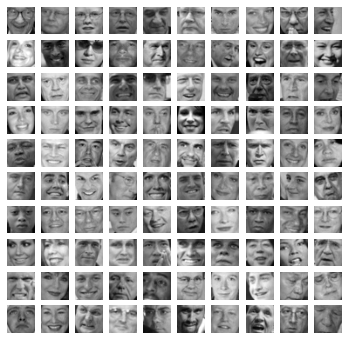

In [3]:
def show_faces(x, nsquare, filename):
    x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    x = x.reshape((x.shape[0], 32, 32))
    x = np.uint8(255 * x)

    fig, ax = plt.subplots(nrows=nsquare, 
                           ncols=nsquare, 
                           figsize=[6, 6])
    for i, axi in enumerate(ax.flat):
        axi.imshow(x[i], cmap='gray', vmin=0, vmax=255)
        axi.axis('off')

show_faces(x, 10, 'pca_faces')

##### Principal Components Visualization

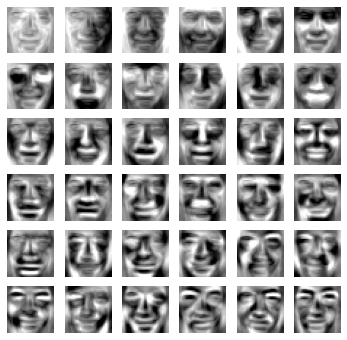

In [4]:
x_mean = x - x.mean(axis=0)
x_cov = np.dot(x.T, x) / x.shape[0]

eigvals, eigvecs = linalg.eig(x_cov)
idx = np.argsort(eigvals)[::-1]
pc36 = eigvecs[:, idx[:36]].T

show_faces(pc36, 6, 'pca_36pcs')

##### Faces Reconstruction with 100 PCs Visualization

In [5]:
pi = x_mean.dot(eigvecs[:, :100])
x_proj = pi.dot(eigvecs[:, :100].T)

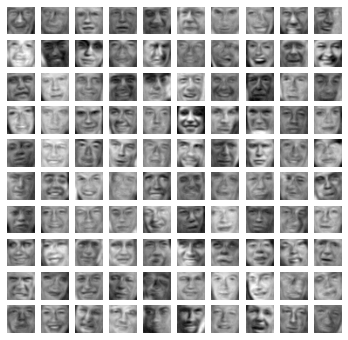

In [6]:
show_faces(x_proj, 10, 'pca_projected')